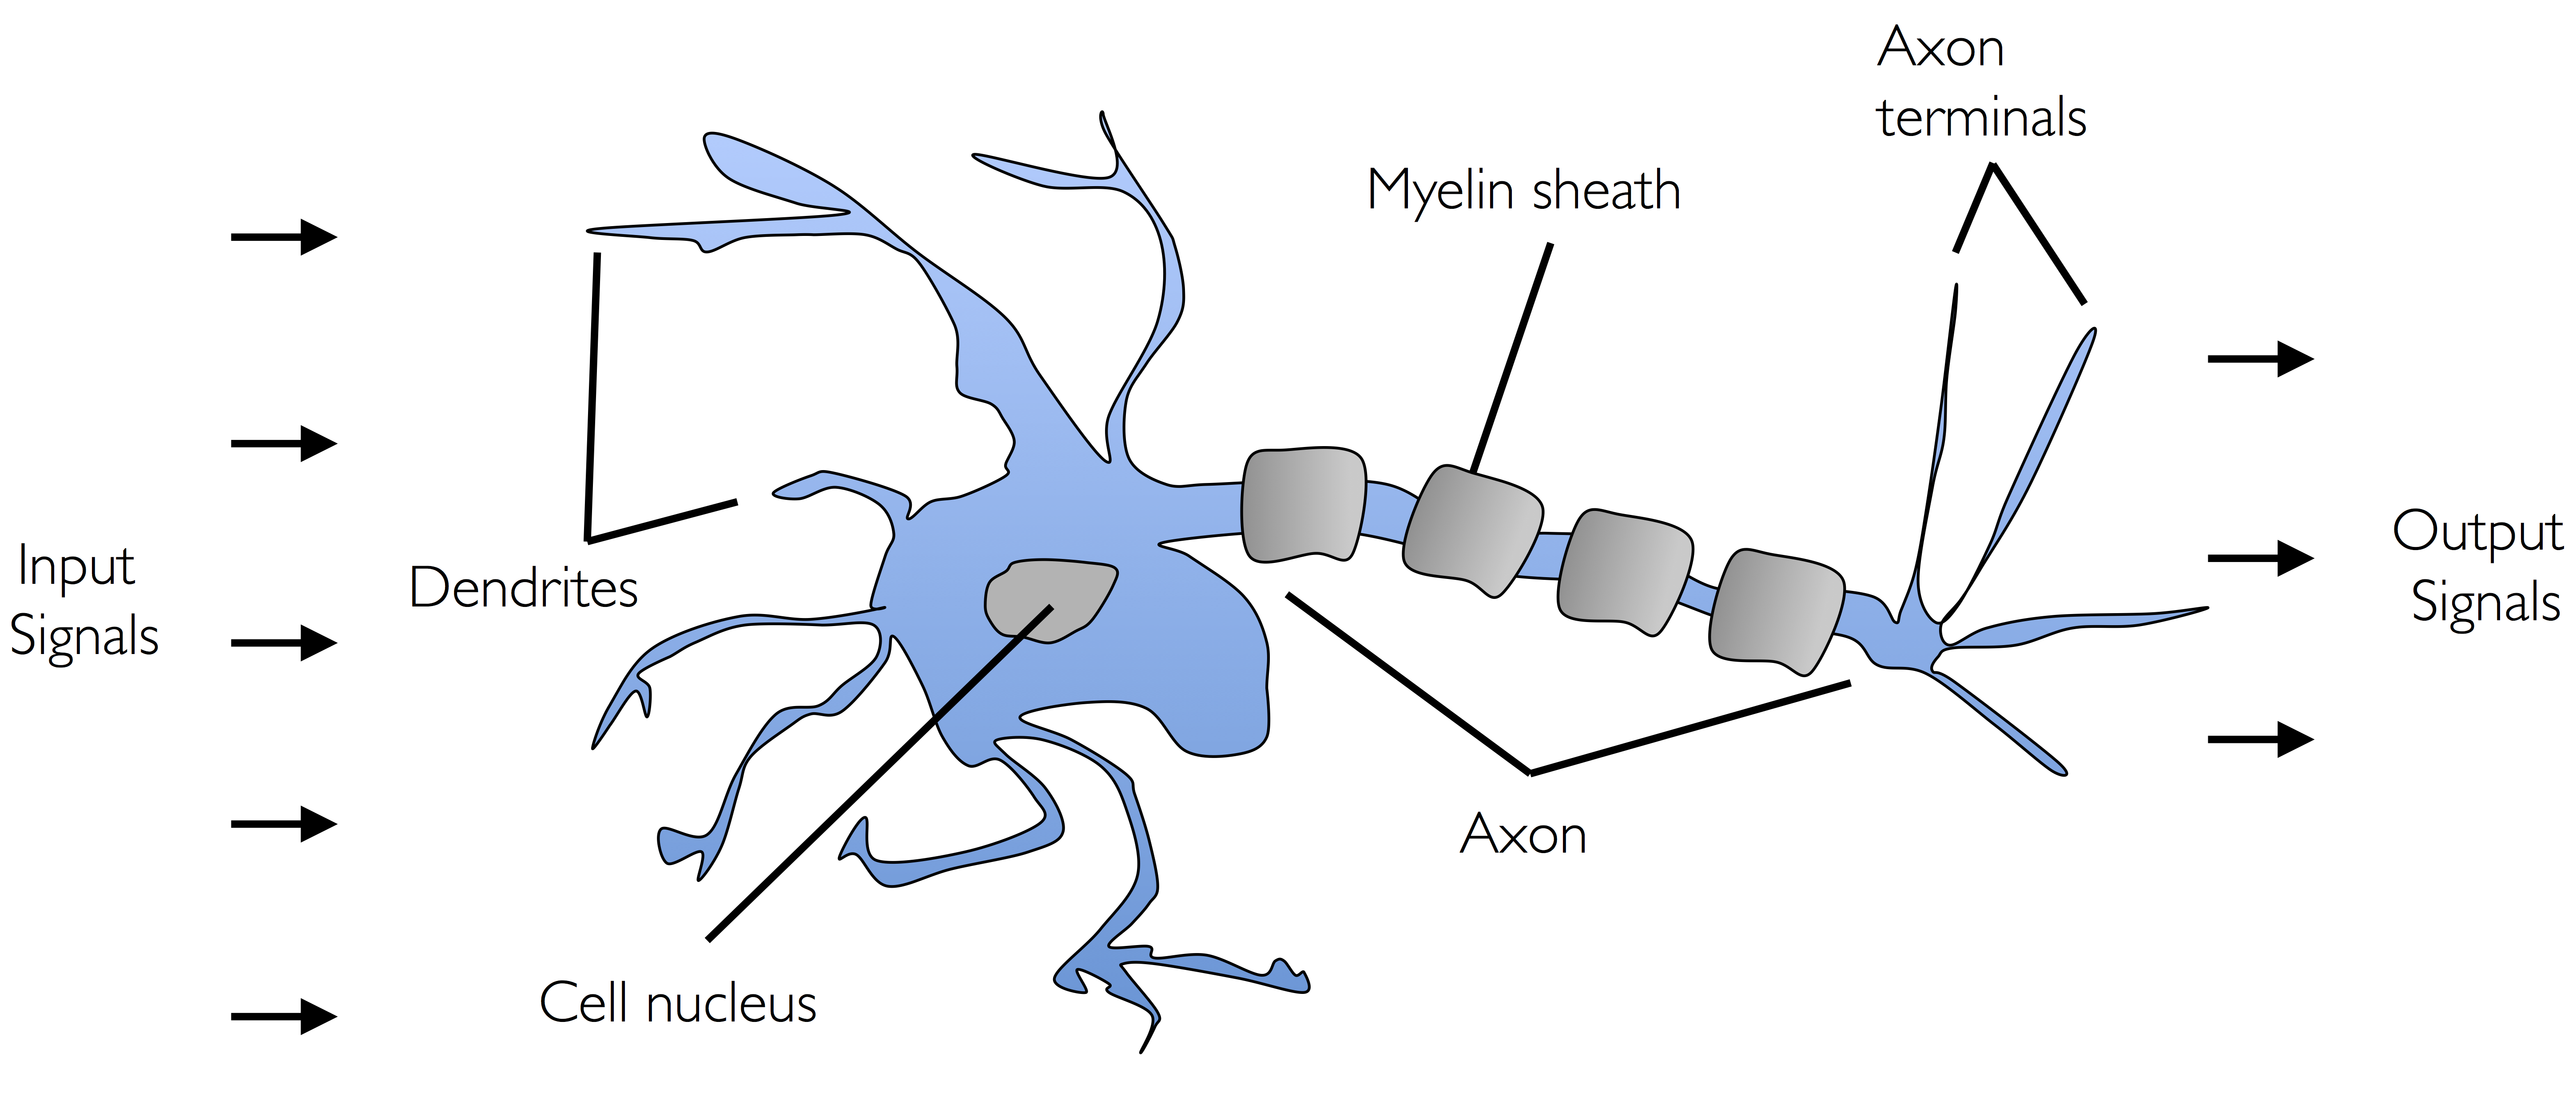

In [1]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_02/2_1.png', width=600)

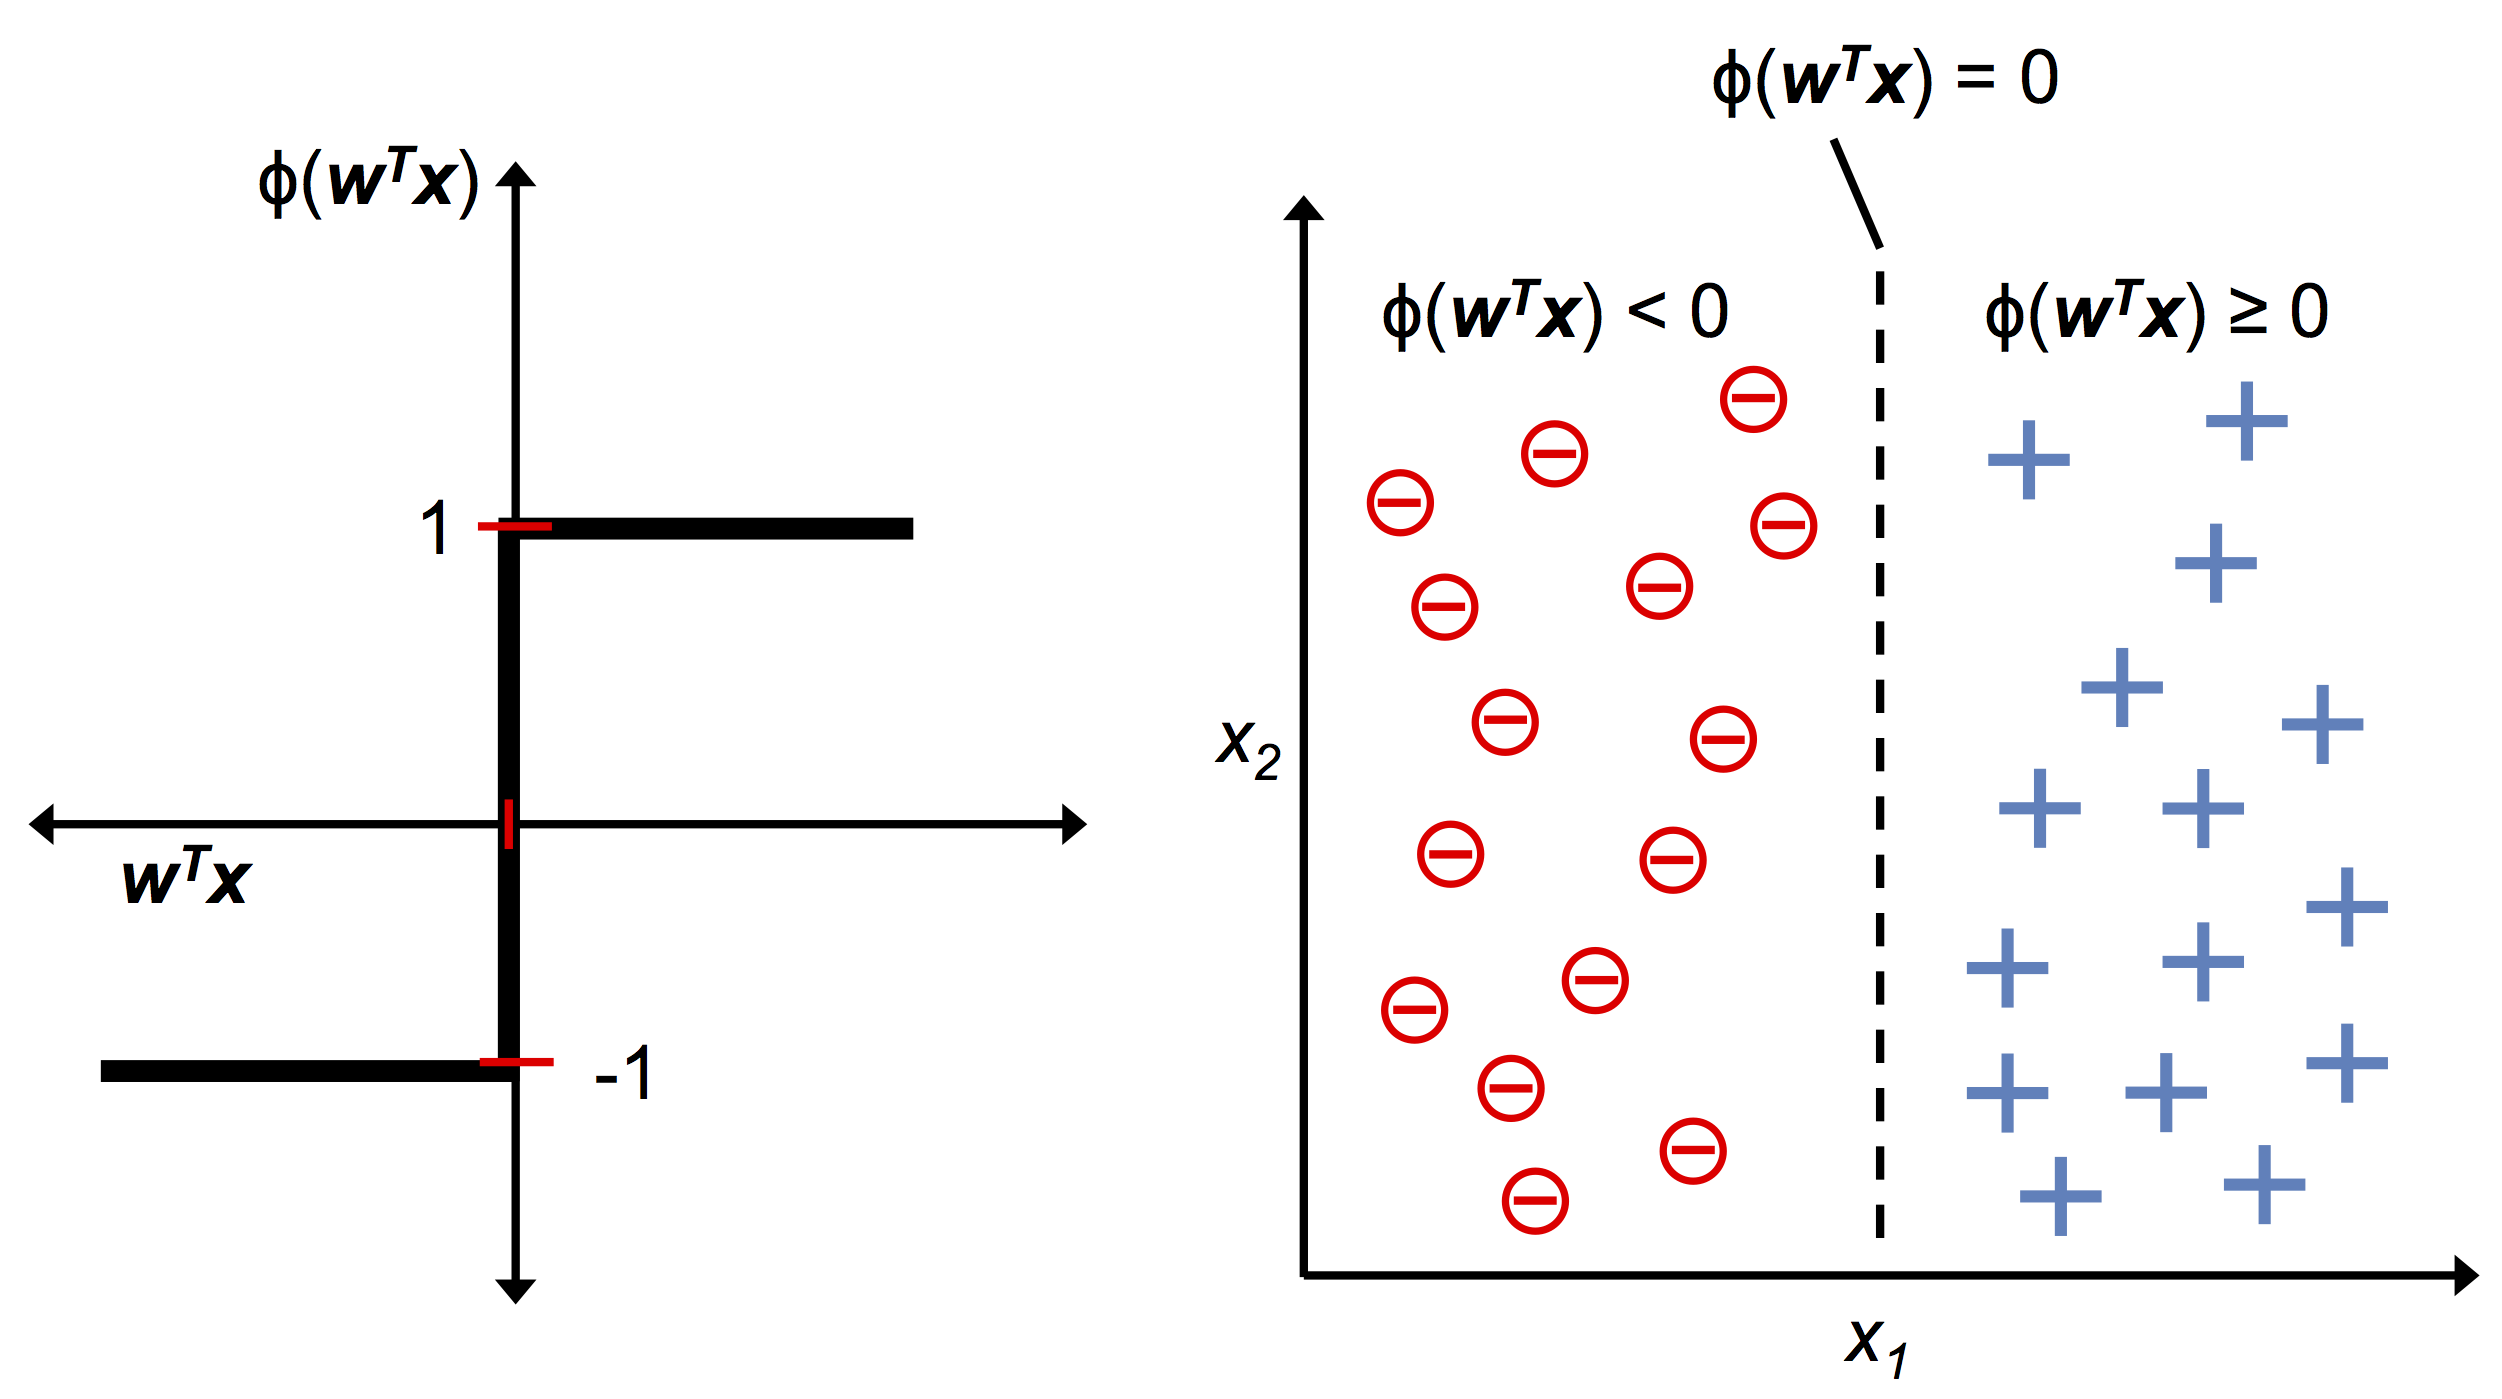

In [2]:
Image(filename=r'Imagenes_Clase_02/2_2.png', width=600)

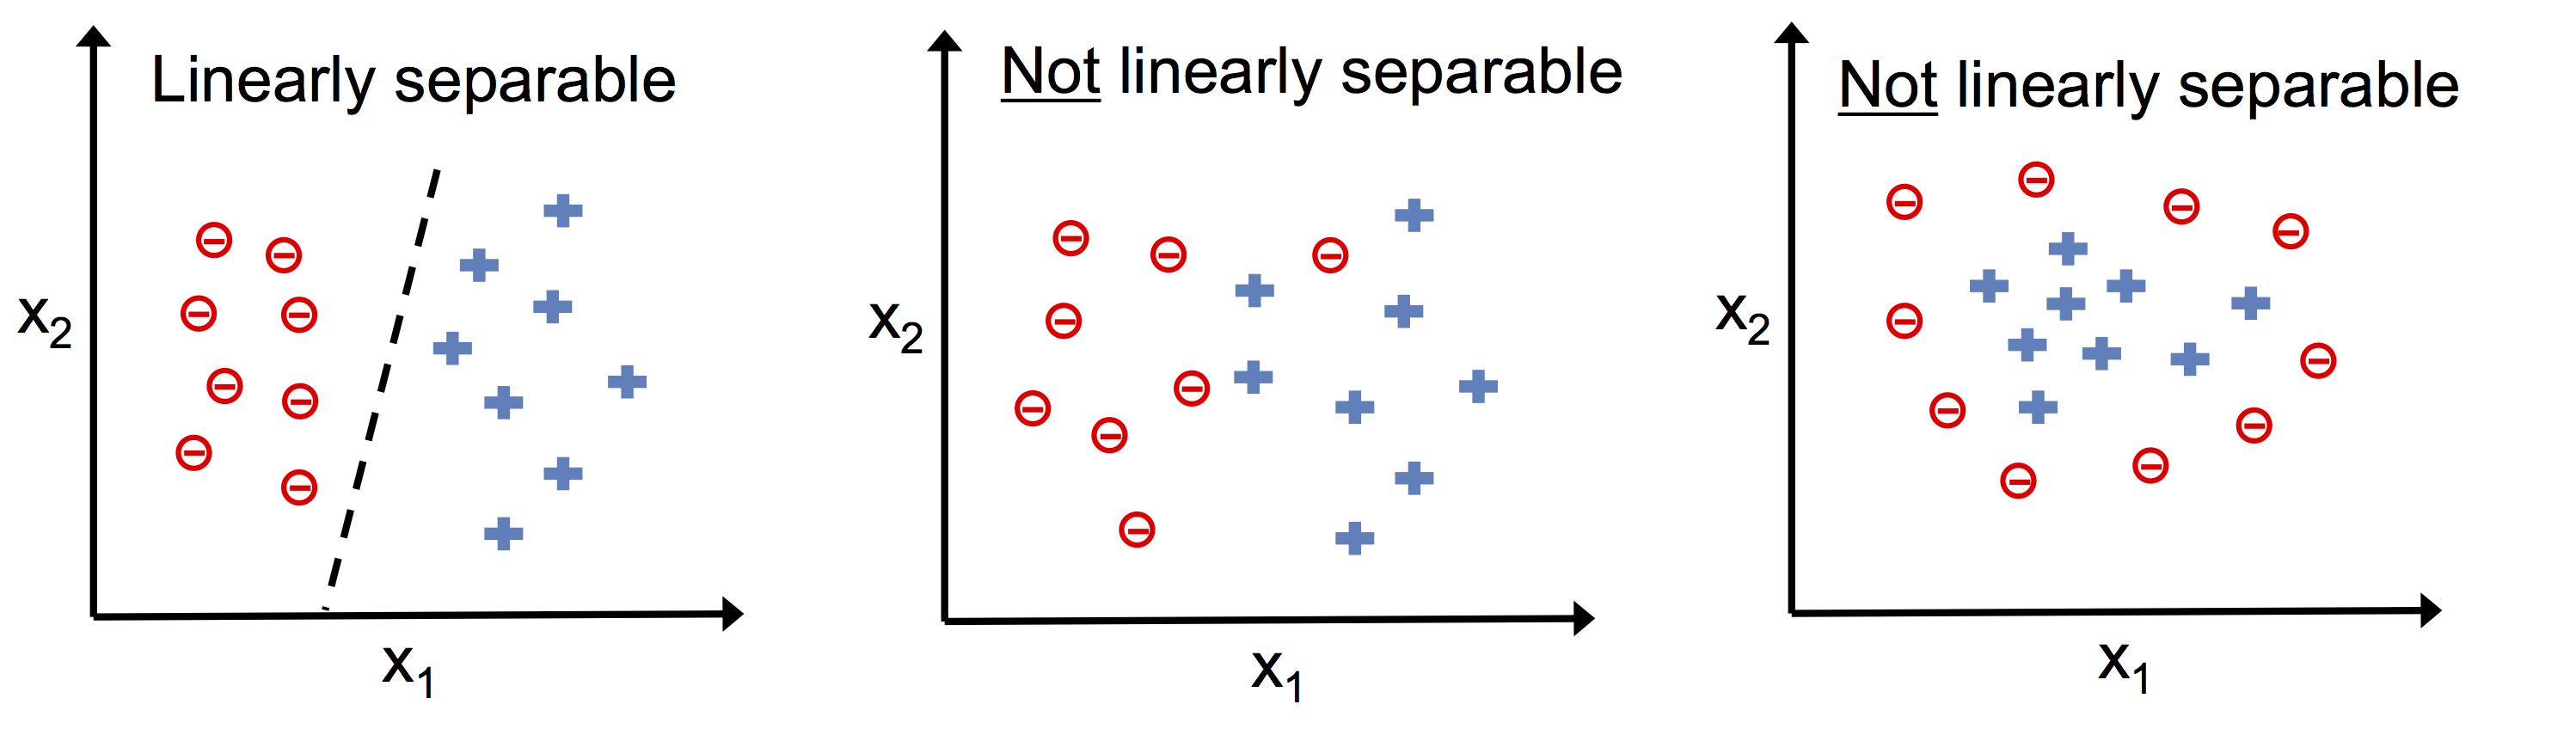

In [3]:
Image(filename=r'Imagenes_Clase_02/2_3.png', width=750)

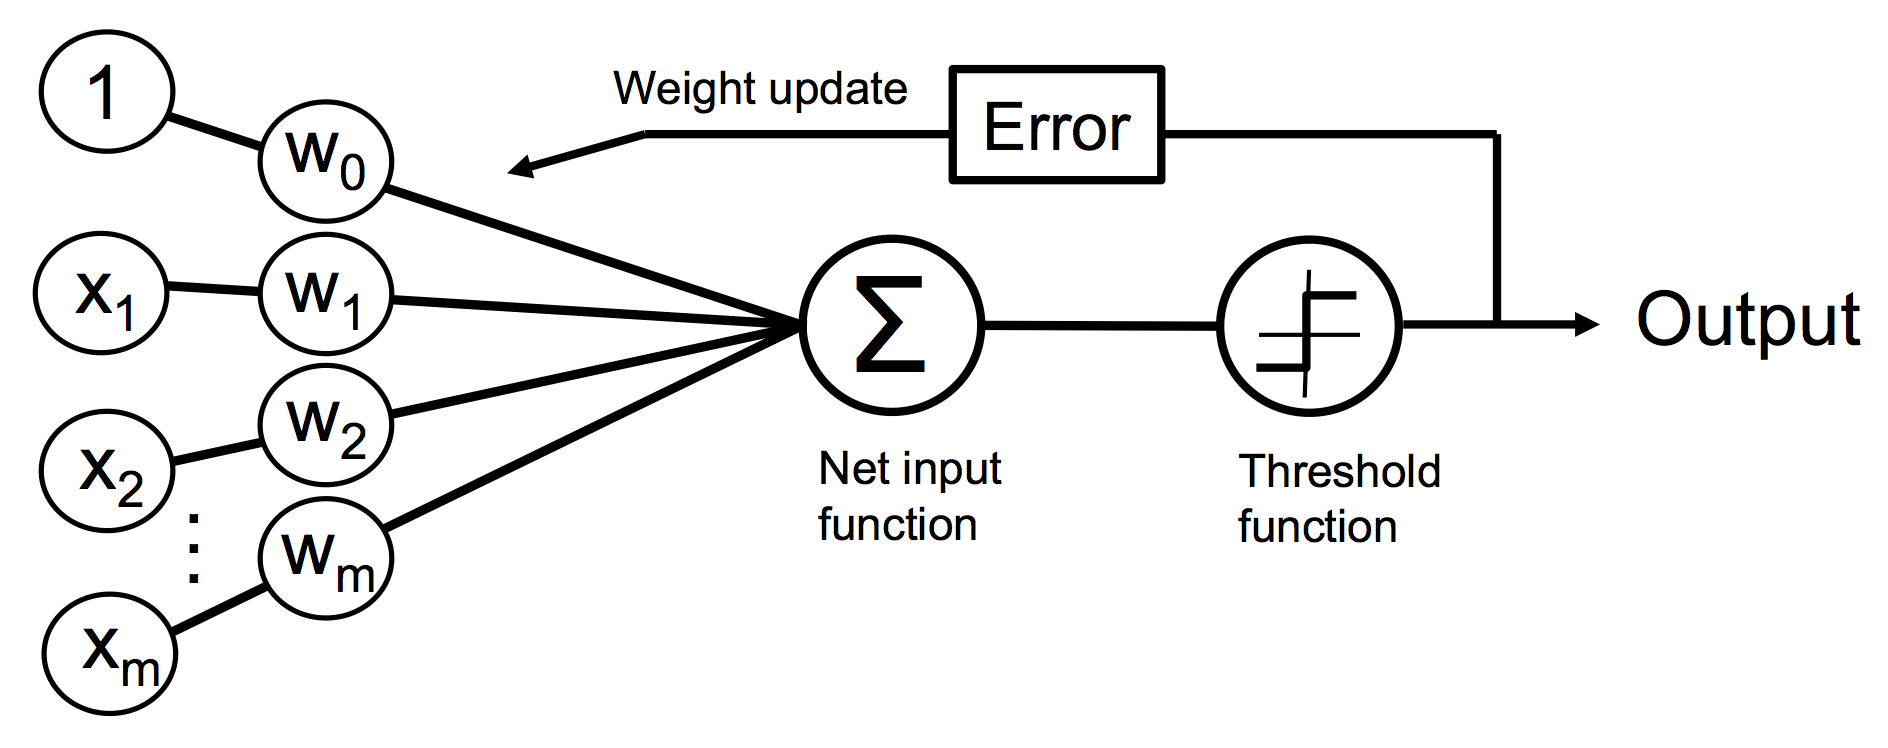

In [4]:
Image(filename=r'Imagenes_Clase_02/2_4.png', width=600)


In [31]:
import numpy as np
class Perceptron(object):
    """ Perceptron classifier.
    Parametros
    ------------
    eta : float
    Learning rate (entre 0.0 y 1.0)
    n_iter : int
    Cantidad de épocas de entrenamiento.
    random_state : int
    Semilla del generador de números aleatorios para
    la inicialización de pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
    Vector de peso después del entrenamiento.
    errors_ : list
    Número de clasificaciones erróneas (actualizaciones) en cada época.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de muestras y
        n_features es el número de características.
        y : array-like, shape = [n_samples]
        Valor de salida.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calcular entrada neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [29]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df.head(5)


sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

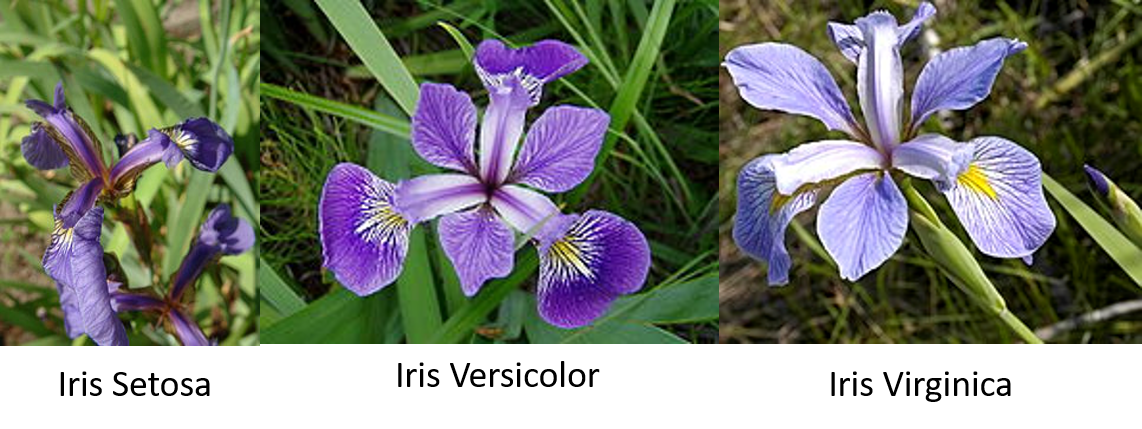

In [14]:
Image(filename=r'Imagenes_Clase_02/Flores.png', width=750)


In [15]:
df.tail(5)


sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [16]:
df.describe()


sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [17]:
df.iloc[45:55, :]


sepal_length  sepal_width  petal_length  petal_width            class
45           4.8          3.0           1.4          0.3      Iris-setosa
46           5.1          3.8           1.6          0.2      Iris-setosa
47           4.6          3.2           1.4          0.2      Iris-setosa
48           5.3          3.7           1.5          0.2      Iris-setosa
49           5.0          3.3           1.4          0.2      Iris-setosa
50           7.0          3.2           4.7          1.4  Iris-versicolor
51           6.4          3.2           4.5          1.5  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
53           5.5          2.3           4.0          1.3  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor

In [18]:
df.iloc[95:105, :]


sepal_length  sepal_width  petal_length  petal_width            class
95            5.7          3.0           4.2          1.2  Iris-versicolor
96            5.7          2.9           4.2          1.3  Iris-versicolor
97            6.2          2.9           4.3          1.3  Iris-versicolor
98            5.1          2.5           3.0          1.1  Iris-versicolor
99            5.7          2.8           4.1          1.3  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica
101           5.8          2.7           5.1          1.9   Iris-virginica
102           7.1          3.0           5.9          2.1   Iris-virginica
103           6.3          2.9           5.6          1.8   Iris-virginica
104           6.5          3.0           5.8          2.2   Iris-virginica

In [19]:
df.describe(include='all')
# describe con include='all' es la que fuerza que se muestren todas variables
# incluyendo las categóricas
# Todas las variables deben tener el type correcto par

sepal_length  sepal_width  petal_length  petal_width        class
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [21]:
name_clases=list(np.unique(y))
y_numeric = np.where(y == name_clases[0], -1, 1)
print(y_numeric)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


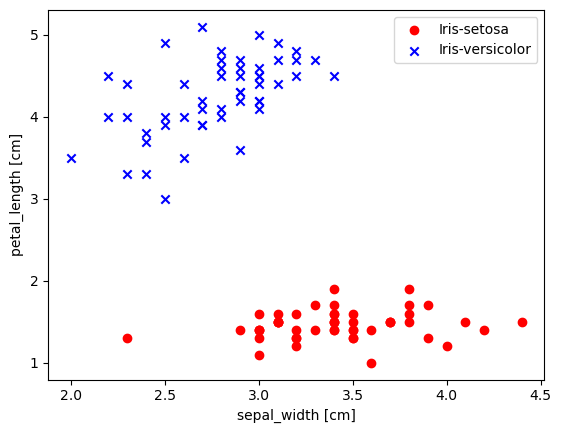

In [22]:
X = df.iloc[0:100, [1, 2]].values
variable_names=list(df.columns[[1,2]])
#plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
#plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label=name_clases[0])
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label=name_clases[1])
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper right')
#plt.savefig('02_06.png', dpi=300)
plt.show()


In [32]:
ppn = Perceptron(eta=0.1, n_iter=30)
ppn.fit(X, y_numeric)
for i in range(len(ppn.w_)):
    print('w[{}] = {}'.format(i,ppn.w_[i]))


w[0] = -0.18375654636336758
w[1] = -0.7261175641365007
w[2] = 1.0347182824773657


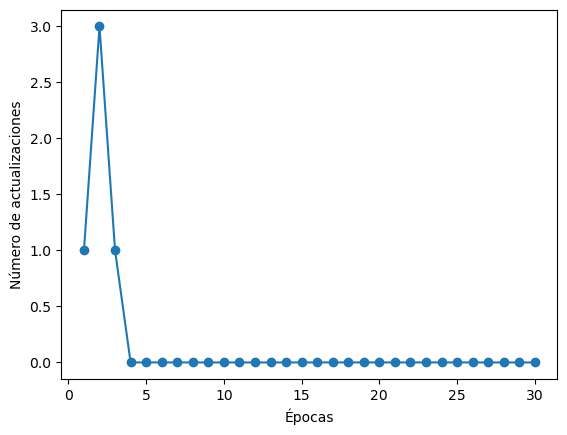

In [33]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
#plt.savefig('02_07.png', dpi=300)
plt.show()


In [34]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, clases_names=['clase 0','clase 1'], resolution=0.02):
    markers = ('s', 'o', '^', 'v','x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        if cl == -1:
            #label = 'setosa'
            label = clases_names[0]
        else:
            #label = 'versicolor'
            label = clases_names[1]
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
    marker=markers[idx], label=label,edgecolor='black')


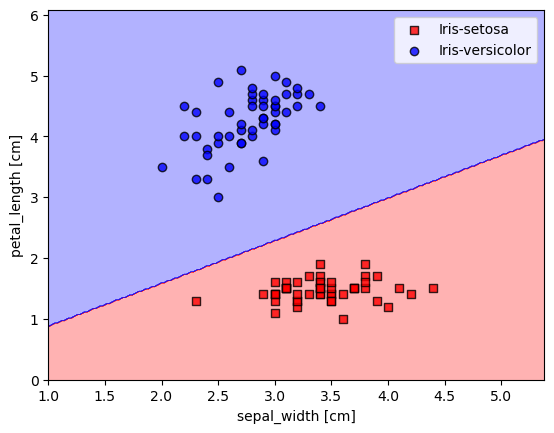

In [35]:
plot_decision_regions(X, y_numeric, classifier=ppn,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper right')
#plt.savefig('02_08.png', dpi=300)
plt.show()

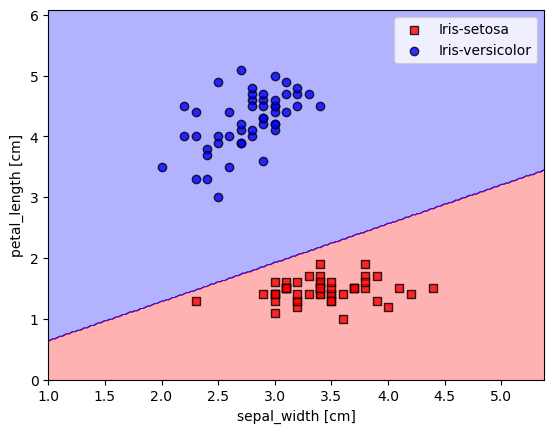

In [28]:
from sklearn.linear_model import Perceptron
ppn_skl = Perceptron(max_iter=10, alpha=0.1, random_state=1, n_jobs=-1)
ppn_skl.fit(X, y_numeric)
plot_decision_regions(X, y_numeric, classifier=ppn_skl, clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
#plt.xlabel('largo sétalo [cm]')
#plt.ylabel('largo pétalo [cm]')
plt.legend(loc='upper right')
plt.show()

TAREA

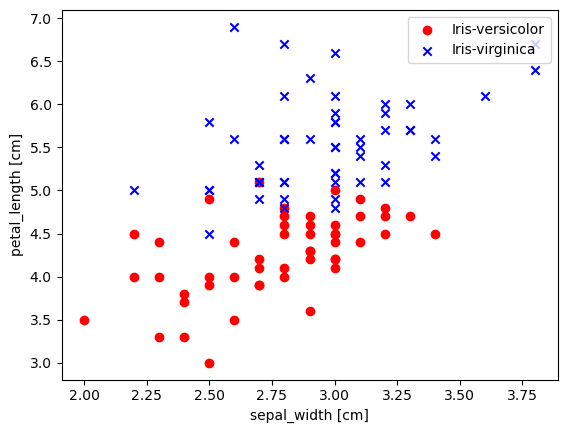

In [42]:
y = df.iloc[50:150, 4].values
name_clases=list(np.unique(y))
y_numeric = np.where(y == name_clases[0], -1, 1)
X = df.iloc[50:150, [1, 2]].values
variable_names=list(df.columns[[1,2]])

#plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
#plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label=name_clases[0])
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label=name_clases[1])
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper right')
#plt.savefig('02_06.png', dpi=300)
plt.show()